<a href="https://colab.research.google.com/github/Devbiradar/DiseaseDetection/blob/main/(VGG16)DiseaseDetectionInRagi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementation with **VGG16** **

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

seeding for reproducibility

In [2]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [3]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

In [4]:
!pip install kaggle

In [7]:
kaggle_credentails = json.load(open("kaggle.json"))

In [8]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [9]:
!kaggle datasets download -d prajwalbax/finger-millet-ragi-dataset

Dataset URL: https://www.kaggle.com/datasets/prajwalbax/finger-millet-ragi-dataset
License(s): unknown
 93% 51.0M/55.0M [00:02<00:00, 25.3MB/s]
100% 55.0M/55.0M [00:02<00:00, 21.4MB/s]


In [10]:
!ls

finger-millet-ragi-dataset.zip	kaggle.json  sample_data


In [11]:
# Unzip the downloaded dataset
with ZipFile("/content/finger-millet-ragi-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [12]:
print(os.listdir("ragi"))


print(len(os.listdir("ragi/downy")))
print(os.listdir("ragi/downy")[:5])

print(len(os.listdir("ragi/healthy")))
print(os.listdir("ragi/healthy")[:5])

print(len(os.listdir("ragi/mottle")))
print(os.listdir("ragi/mottle")[:5])

print(len(os.listdir("ragi/seedling")))
print(os.listdir("ragi/seedling")[:5])

print(len(os.listdir("ragi/smut")))
print(os.listdir("ragi/smut")[:5])

print(len(os.listdir("ragi/wilt")))
print(os.listdir("ragi/wilt")[:5])

['wilt', 'seedling', 'mottle', 'healthy', 'smut', 'downy']
255
['downymildew (118).jpg', 'downymildew (55).jpg', 'downymildew (155).jpg', 'downymildew (59).jpg', 'downymildew (243).jpg']
255
['healthy (67).jpg', 'healthy (98).jpg', 'healthy (66).jpg', 'healthy (173).jpg', 'healthy (34).jpg']
255
['mottle_streak (20).jpg', 'mottle_streak (65).jpeg', 'mottle_streak (32).jpg', 'mottle_streak (156).jpg', 'mottle_streak (201).jpg']
255
['seedling (41).jpg', 'seedling (28).jpg', 'seedling (92).jpg', 'seedling (174).jpg', 'seedling (171).jpg']
255
['smut (170).jpg', 'smut (2).jpeg', 'smut (246).jpg', 'smut (146).jpg', 'smut (181).jpg']
255
['wilt (132).jpg', 'wilt (47).jpg', 'wilt (240).jpg', 'wilt (122).jpg', 'wilt (22).jpg']


Number of Classes = 6

In [13]:
print(len(os.listdir("ragi/healthy")))
print(os.listdir("ragi/healthy")[:5])

255
['healthy (67).jpg', 'healthy (98).jpg', 'healthy (66).jpg', 'healthy (173).jpg', 'healthy (34).jpg']


Data **Preprocessing**

In [14]:
# Dataset Path
base_dir = 'ragi'

(159, 159, 3)


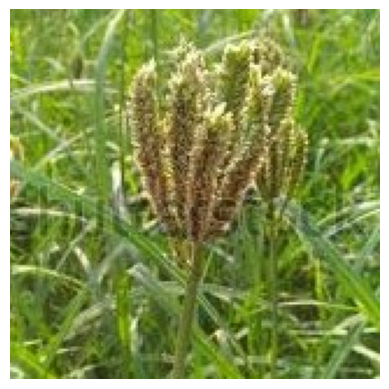

In [15]:
image_path = '/content/ragi/healthy/healthy (1).jpeg'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [16]:
image_path = '/content/ragi/healthy/healthy (10).jpeg'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[ 92 103   7]
  [ 92 103   7]
  [ 89 103   5]
  ...
  [169 140  12]
  [164 135   0]
  [176 137   0]]

 [[ 92 103   7]
  [ 92 103   7]
  [ 89 103   5]
  ...
  [166 139  10]
  [165 137   2]
  [175 135   1]]

 [[ 93 105   7]
  [ 93 105   7]
  [ 90 104   6]
  ...
  [157 133   7]
  [164 137   6]
  [173 133   2]]

 ...

 [[100 119  11]
  [ 99 119   8]
  [ 97 117   4]
  ...
  [168 131   0]
  [167 128   0]
  [170 130   0]]

 [[100 116   7]
  [ 98 116   6]
  [ 96 114   2]
  ...
  [168 129   0]
  [168 128   0]
  [172 129   0]]

 [[104 113   4]
  [101 113   1]
  [100 114   1]
  ...
  [168 128   0]
  [169 126   0]
  [171 128   0]]]


**Train Test Split**

In [17]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [18]:
img_size = 128
batch_size = 32
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 1212 images belonging to 6 classes.


In [19]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 302 images belonging to 6 classes.


**Xception**

In [20]:
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.applications import VGG16

# Load the pre-trained VGG16 model without the top layers (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Create a new model with VGG16 as the base
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

# Phase 1: Freeze the base model to train only the new layers
base_model.trainable = False

# Compile the model with the base layers frozen
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the new data
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Phase 2: Unfreeze some layers in the base model for fine-tuning
# Unfreezing the last 4 layers
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
              loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training (fine-tuning the unfrozen layers)
fine_tune_history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 388ms/step - accuracy: 0.3244 - loss: 2.6198 - val_accuracy: 0.7152 - val_loss: 0.8239
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.7527 - loss: 0.7114 - val_accuracy: 0.8510 - val_loss: 0.5413
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.8442 - loss: 0.4485 - val_accuracy: 0.8709 - val_loss: 0.4314
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9035 - loss: 0.3053 - val_accuracy: 0.8113 - val_loss: 0.4891
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9121 - loss: 0.2593 - val_accuracy: 0.8377 - val_loss: 0.4661
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9590 - loss: 0.1533 - val_accuracy: 0.8775 - val_loss: 0.3521
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9604 - loss: 0.1213 - val_accuracy: 0.8477 - val_loss: 0.4481
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9713 - loss: 0.1245 - val_accuracy: 0.8841 - val_loss: 

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,467,220 (158.18 MB)

 Trainable params: 11,277,318 (43.02 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 22,554,638 (86.04 MB)

In [22]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8772 - loss: 0.4152
Validation Accuracy: 89.58%


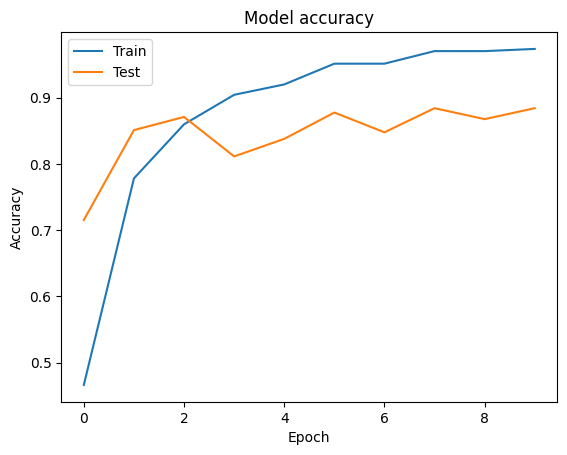

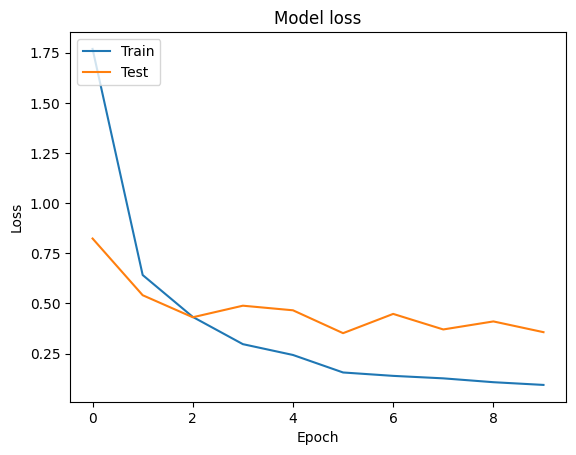

In [23]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# **Building a Predictive System**

In [24]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [25]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [26]:
class_indices

{0: 'downy', 1: 'healthy', 2: 'mottle', 3: 'seedling', 4: 'smut', 5: 'wilt'}

In [27]:
class_names = {v: k for k, v in class_indices.items()}
print("Class Names:", class_names)

Class Names: {'downy': 0, 'healthy': 1, 'mottle': 2, 'seedling': 3, 'smut': 4, 'wilt': 5}


In [28]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [29]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image_class(model, image_path, class_indices):
    """
    Predict the class of a single image using a pre-trained model.

    Args:
    - model: Trained model for prediction.
    - image_path: Path to the image file.
    - class_indices: A dictionary mapping class names to their corresponding indices.

    Returns:
    - predicted_class_name: The name of the predicted class.
    """
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(128, 128))  # Match this size to your model's input shape
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize to [0, 1] range if necessary

    # Make predictions
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    print(f"Predicted class index: {predicted_class_index}")

    # Print out the class indices to debug
    print(f"Class indices: {class_indices}")

    # Get the predicted class name (handling potential KeyError)
    predicted_class_name = class_indices.get(predicted_class_index, "Unknown")
    print(f"Predicted class name: {predicted_class_name}")

    return predicted_class_name

In [30]:
# Example Usage
image_path = '/content/ragi/mottle/mottle_streak (104).jpg'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

print(predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class index: 2
Class indices: {0: 'downy', 1: 'healthy', 2: 'mottle', 3: 'seedling', 4: 'smut', 5: 'wilt'}
Predicted class name: mottle
mottle


In [33]:
from google.colab import drive
drive.mount('/content/drive')

# Specify a valid path on your Google Drive
model.save('/content/drive/MyDrive/my_model.keras')  # or .h5

Mounted at /content/drive
